### 다양한 스포츠 공 분류⚽⚾🥎🏀🏐

In [112]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/sportball/original/'

idg = ImageDataGenerator(rescale=1./255)

generator = idg.flow_from_directory(root, target_size=(224, 224), batch_size=32, class_mode='categorical')
print(generator.class_indices)

Found 9173 images belonging to 15 classes.
{'american_football': 0, 'baseball': 1, 'basketball': 2, 'billiard_ball': 3, 'bowling_ball': 4, 'cricket_ball': 5, 'football': 6, 'golf_ball': 7, 'hockey_ball': 8, 'hockey_puck': 9, 'rugby_ball': 10, 'shuttlecock': 11, 'table_tennis_ball': 12, 'tennis_ball': 13, 'volleyball': 14}


In [2]:
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'american_football',
 1: 'baseball',
 2: 'basketball',
 3: 'billiard_ball',
 4: 'bowling_ball',
 5: 'cricket_ball',
 6: 'football',
 7: 'golf_ball',
 8: 'hockey_ball',
 9: 'hockey_puck',
 10: 'rugby_ball',
 11: 'shuttlecock',
 12: 'table_tennis_ball',
 13: 'tennis_ball',
 14: 'volleyball'}

In [3]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])

In [4]:
import pandas as pd

df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names, 'targets': generator.classes})
df.file_paths = df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
df

,file_paths,target_names,targets
0,./datasets/sportball/original/american_footbal...,american_football,0
1,./datasets/sportball/original/american_footbal...,american_football,0
2,./datasets/sportball/original/american_footbal...,american_football,0
3,./datasets/sportball/original/american_footbal...,american_football,0
4,./datasets/sportball/original/american_footbal...,american_football,0
...,...,...,...
9168,./datasets/sportball/original/volleyball/volle...,volleyball,14
9169,./datasets/sportball/original/volleyball/volle...,volleyball,14
9170,./datasets/sportball/original/volleyball/volle...,volleyball,14
9171,./datasets/sportball/original/volleyball/volle...,volleyball,14


In [5]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_targets, test_targets = \
train_test_split(df.file_paths, 
                 df.targets, 
                 stratify=df.targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(test_targets.value_counts())

targets
3     647
12    621
6     604
5     581
7     550
8     531
10    494
13    490
4     441
14    434
11    430
1     400
9     390
0     384
2     341
Name: count, dtype: int64
targets
3     162
12    156
6     151
5     146
7     137
8     133
10    123
13    123
4     110
14    108
11    107
1     100
9      98
0      96
2      85
Name: count, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, 
                 train_targets, 
                 stratify=train_targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(validation_targets.value_counts())
print(test_targets.value_counts())

targets
3     517
12    497
6     483
5     465
7     440
8     425
10    395
13    392
4     353
14    347
11    344
1     320
9     312
0     307
2     273
Name: count, dtype: int64
targets
3     130
12    124
6     121
5     116
7     110
8     106
10     99
13     98
4      88
14     87
11     86
1      80
9      78
0      77
2      68
Name: count, dtype: int64
targets
3     162
12    156
6     151
5     146
7     137
8     133
10    123
13    123
4     110
14    108
11    107
1     100
9      98
0      96
2      85
Name: count, dtype: int64


In [7]:
train_df = df.iloc[train_images.index].reset_index(drop=True)
validation_df = df.iloc[validation_images.index].reset_index(drop=True)
test_df = df.iloc[test_images.index].reset_index(drop=True)

print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(5870, 3)
(1468, 3)
(1835, 3)


#### 📌 IMAGE 확인

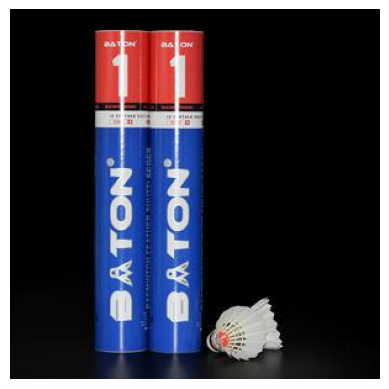

In [71]:
import cv2 
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[5869]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import albumentations as A

IMAGE_SIZE = 150
BATCH_SIZE = 64

# def transform(image):
#     aug = A.Compose([
#         A.HorizontalFlip(p=0.5), 
#         A.VerticalFlip(p=0.5), 
#         A.OneOf([
#             A.ColorJitter(p=1), 
#             A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1)
#         ], p=1)
#     ], p=0.5)

#     return aug(image=image)['image']

train_generator = ImageDataGenerator(rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

# flow_from_dataframe에서 y_col에 들어갈 타겟 데이터는 문자열 타입만 가능하다.
train_flow = train_generator.flow_from_dataframe(dataframe=train_df, 
                                                 x_col='file_paths', 
                                                 y_col='target_names',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df, 
                                                 x_col='file_paths', 
                                                 y_col='target_names',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical')

test_flow = test_generator.flow_from_dataframe(dataframe=test_df, 
                                                 x_col='file_paths', 
                                                 y_col='target_names',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical')

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 5870 validated image filenames belonging to 15 classes.
Found 1468 validated image filenames belonging to 15 classes.
Found 1835 validated image filenames belonging to 15 classes.
{'american_football': 0, 'baseball': 1, 'basketball': 2, 'billiard_ball': 3, 'bowling_ball': 4, 'cricket_ball': 5, 'football': 6, 'golf_ball': 7, 'hockey_ball': 8, 'hockey_puck': 9, 'rugby_ball': 10, 'shuttlecock': 11, 'table_tennis_ball': 12, 'tennis_ball': 13, 'volleyball': 14}
{'american_football': 0, 'baseball': 1, 'basketball': 2, 'billiard_ball': 3, 'bowling_ball': 4, 'cricket_ball': 5, 'football': 6, 'golf_ball': 7, 'hockey_ball': 8, 'hockey_puck': 9, 'rugby_ball': 10, 'shuttlecock': 11, 'table_tennis_ball': 12, 'tennis_ball': 13, 'volleyball': 14}
{'american_football': 0, 'baseball': 1, 'basketball': 2, 'billiard_ball': 3, 'bowling_ball': 4, 'cricket_ball': 5, 'football': 6, 'golf_ball': 7, 'hockey_ball': 8, 'hockey_puck': 9, 'rugby_ball': 10, 'shuttlecock': 11, 'table_tennis_ball': 12, 'tennis_

In [92]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(600, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(15, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [94]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/sportsball/mobilenet/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.keras",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=False,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

### 🖥️ Cycle 1. MobileNet

In [96]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy


model = create_model(model_name='mobilenet', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_19108\1388164011.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)   │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 75, 75, 32)        │             864 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 75, 75, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 75, 75, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 75, 75, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 75, 75, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 75, 75, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 75, 75, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 75, 75, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 75, 75, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 75, 75, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 75, 75, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 77, 77, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 38, 38, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,035,599 (11.58 MB)

 Trainable params: 3,001,487 (11.45 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [97]:
import gc

gc.collect()

24051

In [98]:
N_EPOCHS = 20

history = model.fit(train_flow, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


184/184 ━━━━━━━━━━━━━━━━━━━━ 91s 364ms/step - acc: 0.3774 - loss: 2.1637 - val_acc: 0.1328 - val_loss: 7.0609 - learning_rate: 0.0010
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 66s 353ms/step - acc: 0.6492 - loss: 1.2233 - val_acc: 0.2275 - val_loss: 5.9590 - learning_rate: 0.0010
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 66s 351ms/step - acc: 0.7299 - loss: 0.9483 - val_acc: 0.2609 - val_loss: 6.4994 - learning_rate: 0.0010
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 66s 352ms/step - acc: 0.7547 - loss: 0.8789 - val_acc: 0.2023 - val_loss: 6.2942 - learning_rate: 0.0010
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 66s 352ms/step - acc: 0.8447 - loss: 0.5487 - val_acc: 0.3113 - val_loss: 4.6964 - learning_rate: 1.0000e-04
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 66s 354ms/step - acc: 0.8916 - loss: 0.3600 - val_acc: 0.4707 - val_loss: 3.2603 - learning_rate: 1.0000e-04
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 66s 351ms/step - acc: 0.9286 - loss: 0.2296 - val_acc: 0.6342 - val_loss: 1.9096 - learning_r

In [101]:
model.evaluate(test_flow)

58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 406ms/step - acc: 0.8312 - loss: 0.7690


[0.7975239753723145, 0.8321526050567627]

In [103]:
model.evaluate(train_flow)

184/184 ━━━━━━━━━━━━━━━━━━━━ 30s 161ms/step - acc: 0.9997 - loss: 0.0035


[0.004013745114207268, 0.999318540096283]

In [104]:
model.evaluate(validation_flow)

46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - acc: 0.8599 - loss: 0.6609


[0.7433730959892273, 0.8501362204551697]

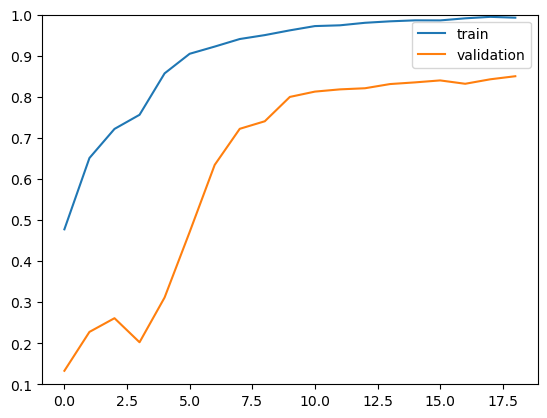

In [105]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.ylim(0.1, 1.0)
    plt.show()
    
show_history(history)

### 📋 Cycle 1. MobileNet 결과

1. acc와 val_acc 모두 epoch를 반복 할 수록 점점 높아지고 있습니다.
2. loss 또한 epoch를 반복 할 수록 개선되고 있습니다.
3. test_flow와 validation_flow의 evaluate 점수 중 acc가 각 0.83, 0.85이고,  
   train_flow의 evaluate 점수 중 acc는 0.99이지만 큰 차이가 나지 않는 점에서 일반화과 잘 되었다고 볼 수 있다.

### 🎯 Cycle 1. MobileNet 실제 예측

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


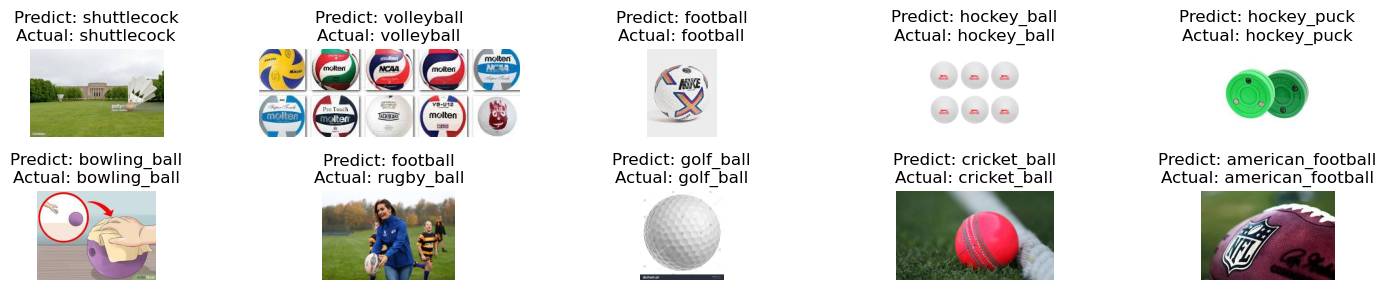

In [143]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


# 이미지 로드 및 전처리

IMAGE_DIR = './datasets/sportball/original/'
IMAGE_SIZE = 150

class_names = ['american_football', 'baseball', 
               'basketball', 'billiard_ball', 'bowling_ball', 
               'cricket_ball', 'football', 'golf_ball', 'hockey_ball', 
               'hockey_puck', 'rugby_ball', 'shuttlecock', 'table_tennis_ball', 
               'tennis_ball', 'volleyball']

def load_random_images(image_dir, class_names, num_images=5):
    # 클래스 이름들을 무작위로 섞고 그 중에서 num_images개 선택
    selected_classes = random.sample(class_names, num_images)
    images = []
    labels = []
    
    for class_name in selected_classes:
        class_dir = os.path.join(image_dir, class_name)
        all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpg')]
        
        # 해당 클래스에서 무작위로 하나의 이미지를 선택
        selected_image = random.choice(all_images)
        images.append(selected_image)
        labels.append(class_name)
    
    return images, labels

def preprocess_image(image_path, image_size):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (image_size, image_size))
    resized_image = preprocess_input(resized_image)
    resized_image = np.expand_dims(resized_image, axis=0)
    return resized_image

# 무작위로 이미지 10개를 로드합니다.
random_images, random_labels = load_random_images(IMAGE_DIR, class_names, num_images=10)

# 각 이미지를 예측하고 결과를 시각화합니다.
plt.figure(figsize=(15, 3))  # 적절한 크기로 설정합니다.

for idx, image_path in enumerate(random_images):
    preprocessed_image = preprocess_image(image_path, IMAGE_SIZE)
    predictions = model.predict(preprocessed_image, batch_size=8)
    predicted_class = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class]
    
    # 이미지 시각화
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, idx + 1)  # 1x5 그리드로 이미지 시각화
    plt.imshow(image)
    plt.title(f"Predict: {predicted_class_name}\nActual: {random_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

---

### 🎯 Cycle 1. MobileNet 실제 예측 결과

<img src="./datasets/sportball/tst/predict_ball_mbilenet.png">

- original 폴더에서 10개를 랜덤하게 뽑아 예측 했을 때, 9개를 맞췄고, 1개를 틀렸습니다.
- 대략 90퍼센트의 정확도를 나타냅니다.
- 성능이 매우 우수합니다.

#### 다음으로는 VGG16을 사용해서 훈련을 진행 해보겠습니다.

### 🖥️ Cycle 2. VGG16

In [147]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import albumentations as A

IMAGE_SIZE = 64
BATCH_SIZE = 64

# def transform(image):
#     aug = A.Compose([
#         A.HorizontalFlip(p=0.5), 
#         A.VerticalFlip(p=0.5), 
#         A.OneOf([
#             A.ColorJitter(p=1), 
#             A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1)
#         ], p=1)
#     ], p=0.5)

#     return aug(image=image)['image']

train_generator = ImageDataGenerator(rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

# flow_from_dataframe에서 y_col에 들어갈 타겟 데이터는 문자열 타입만 가능하다.
train_flow = train_generator.flow_from_dataframe(dataframe=train_df, 
                                                 x_col='file_paths', 
                                                 y_col='target_names',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df, 
                                                 x_col='file_paths', 
                                                 y_col='target_names',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical')

test_flow = test_generator.flow_from_dataframe(dataframe=test_df, 
                                                 x_col='file_paths', 
                                                 y_col='target_names',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical')

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 5870 validated image filenames belonging to 15 classes.
Found 1468 validated image filenames belonging to 15 classes.
Found 1835 validated image filenames belonging to 15 classes.
{'american_football': 0, 'baseball': 1, 'basketball': 2, 'billiard_ball': 3, 'bowling_ball': 4, 'cricket_ball': 5, 'football': 6, 'golf_ball': 7, 'hockey_ball': 8, 'hockey_puck': 9, 'rugby_ball': 10, 'shuttlecock': 11, 'table_tennis_ball': 12, 'tennis_ball': 13, 'volleyball': 14}
{'american_football': 0, 'baseball': 1, 'basketball': 2, 'billiard_ball': 3, 'bowling_ball': 4, 'cricket_ball': 5, 'football': 6, 'golf_ball': 7, 'hockey_ball': 8, 'hockey_puck': 9, 'rugby_ball': 10, 'shuttlecock': 11, 'table_tennis_ball': 12, 'tennis_ball': 13, 'volleyball': 14}
{'american_football': 0, 'baseball': 1, 'basketball': 2, 'billiard_ball': 3, 'bowling_ball': 4, 'cricket_ball': 5, 'football': 6, 'golf_ball': 7, 'hockey_ball': 8, 'hockey_puck': 9, 'rugby_ball': 10, 'shuttlecock': 11, 'table_tennis_ball': 12, 'tennis_

In [148]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(600, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(15, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [149]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/sportsball/vgg16/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.keras",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=False,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [154]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy


model = create_model(model_name='vgg16', verbose=True)
model.compile(optimizer=Adam(1.0000e-04), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_13          │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 600)                 │         307,8

 Total params: 15,031,503 (57.34 MB)

 Trainable params: 15,031,503 (57.34 MB)

 Non-trainable params: 0 (0.00 B)

In [156]:
import gc

gc.collect()

0

In [157]:
N_EPOCHS = 20

history = model.fit(train_flow, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 70s 356ms/step - acc: 0.2606 - loss: 2.3295 - val_acc: 0.5381 - val_loss: 1.5232 - learning_rate: 1.0000e-04
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 67s 356ms/step - acc: 0.5865 - loss: 1.3483 - val_acc: 0.5722 - val_loss: 1.3821 - learning_rate: 1.0000e-04
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 66s 353ms/step - acc: 0.7098 - loss: 0.9604 - val_acc: 0.6328 - val_loss: 1.2284 - learning_rate: 1.0000e-04
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 67s 357ms/step - acc: 0.8052 - loss: 0.6247 - val_acc: 0.6560 - val_loss: 1.1764 - learning_rate: 1.0000e-04
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 67s 357ms/step - acc: 0.8492 - loss: 0.4897 - val_acc: 0.7003 - val_loss: 1.2099 - learning_rate: 1.0000e-04
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 67s 357ms/step - acc: 0.8883 - loss: 0.3607 - val_acc: 0.7153 - val_loss: 1.1697 - learning_rate: 1.0000e-04
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 66s 355ms/step - acc: 0.9189 - loss: 0.2391 - val_acc: 0.7228 - va

In [158]:
model.evaluate(test_flow)

58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - acc: 0.7370 - loss: 1.2672


[1.232442021369934, 0.7498637437820435]

In [159]:
model.evaluate(train_flow)

184/184 ━━━━━━━━━━━━━━━━━━━━ 28s 153ms/step - acc: 0.9990 - loss: 0.0071


[0.007180212996900082, 0.9989778399467468]

In [160]:
model.evaluate(validation_flow)

46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - acc: 0.7731 - loss: 1.0910


[1.1621224880218506, 0.7561308145523071]

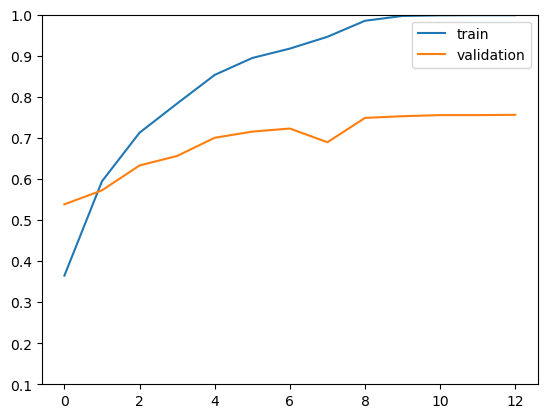

In [161]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.ylim(0.1, 1.0)
    plt.show()
    
show_history(history)

### 📋 Cycle 2. VGG16 결과

1. acc와 val_acc 모두 epoch를 반복 할 수록 점점 높아지고 있습니다.
2. loss 또한 epoch를 반복 할 수록 계선되고 있습니다.
3. Epoch 10 이후부터 val_acc는 계속 증가하고, val_loss는 계속 증가 합니다.

### 🎯 Cycle 2. VGG16 실제 예측

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


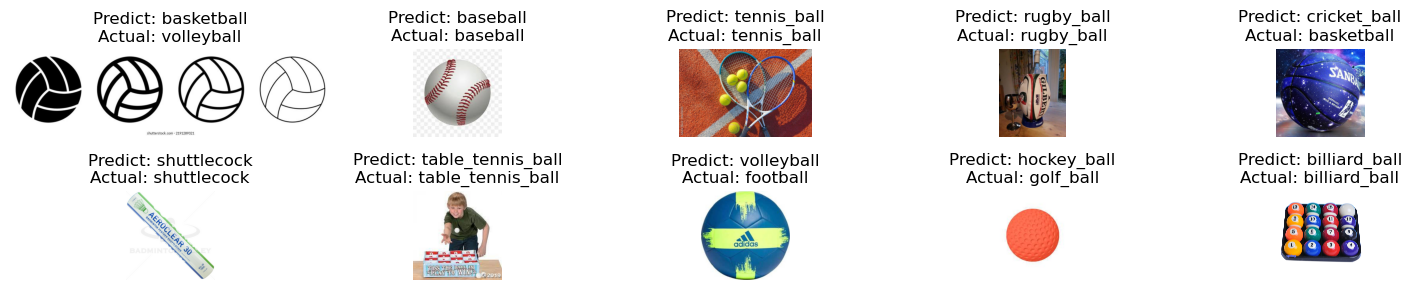

In [164]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input


# 이미지 로드 및 전처리

IMAGE_DIR = './datasets/sportball/original/'
IMAGE_SIZE = 64

class_names = ['american_football', 'baseball', 
               'basketball', 'billiard_ball', 'bowling_ball', 
               'cricket_ball', 'football', 'golf_ball', 'hockey_ball', 
               'hockey_puck', 'rugby_ball', 'shuttlecock', 'table_tennis_ball', 
               'tennis_ball', 'volleyball']

def load_random_images(image_dir, class_names, num_images=5):
    # 클래스 이름들을 무작위로 섞고 그 중에서 num_images개 선택
    selected_classes = random.sample(class_names, num_images)
    images = []
    labels = []
    
    for class_name in selected_classes:
        class_dir = os.path.join(image_dir, class_name)
        all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpg')]
        
        # 해당 클래스에서 무작위로 하나의 이미지를 선택
        selected_image = random.choice(all_images)
        images.append(selected_image)
        labels.append(class_name)
    
    return images, labels

def preprocess_image(image_path, image_size):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (image_size, image_size))
    resized_image = preprocess_input(resized_image)
    resized_image = np.expand_dims(resized_image, axis=0)
    return resized_image

# 무작위로 이미지 10개를 로드합니다.
random_images, random_labels = load_random_images(IMAGE_DIR, class_names, num_images=10)

# 각 이미지를 예측하고 결과를 시각화합니다.
plt.figure(figsize=(15, 3))  # 적절한 크기로 설정합니다.

for idx, image_path in enumerate(random_images):
    preprocessed_image = preprocess_image(image_path, IMAGE_SIZE)
    predictions = model.predict(preprocessed_image, batch_size=8)
    predicted_class = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class]
    
    # 이미지 시각화
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, idx + 1)  # 1x5 그리드로 이미지 시각화
    plt.imshow(image)
    plt.title(f"Predict: {predicted_class_name}\nActual: {random_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

---

### 🎯 Cycle 2. VGG16 실제 예측 결과

<img src="./datasets/sportball/tst/predict_ball_vgg16.png">

- original 폴더에서 10개를 랜덤하게 뽑아 예측 했을 때, 6개를 맞췄고, 4개를 틀렸습니다.
- 대략 60퍼센트의 정확도를 나타냅니다.
- 성능이 준수한 편이지만 MobileNet 보다는 떨어지는 성능입니다.